In [109]:
# !pip install pyreadr
# !pip install plotly

# !conda install -c conda-forge nodejs -y
# !conda install -c conda-forge/label/gcc7 nodejs -y
# !conda install -c conda-forge/label/cf201901 nodejs -y
# !conda install -c conda-forge/label/cf202003 nodejs -y

# !jupyter labextension install jupyterlab-plotly
# !pip install scipy
# !pip install -U kaleido

In [110]:
import pyreadr
import os
import pandas as pd
import numpy as np
import plotly as plt
import plotly.express as px
import scipy
import plotly.figure_factory as ff
import kaleido

In [111]:
ag_data = pd.read_csv("agdata_smoke.csv", sep=",", low_memory=False)
ag_data.head()

,specialized_diet_westenprice_or_other_lowgrain_low_processed_fo,pm_shared_who_other,fermented_produce_personal_beer,fermented_produce_commercial_fermented_breadsourdoughinjera,specialized_diet_exclude_refined_sugars,fermented_plant_frequency,vioscreen_sucpoly,vioscreen_f_total,vioscreen_v_total,vioscreen_sweet_servings,...,fermented_consumed_fermented_beansmisonatto,pm_email,vioscreen_sfa60,vioscreen_sucrose,pm_shared_who_posteddiscussed_on_an_online_patienthealth_platform_ie_patientslikeme,vioscreen_totfolat,vioscreen_frt5_day,meat_eggs_frequency,animal_age,W
0,LabControl test,NaN,NaN,NaN,No,Never,LabControl test,LabControl test,LabControl test,LabControl test,...,NaN,NaN,LabControl test,LabControl test,NaN,LabControl test,LabControl test,Regularly (3-5 times/week),LabControl test,1
1,No,NaN,NaN,NaN,No,Never,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Occasionally (1-2 times/week),NaN,1
2,false,NaN,NaN,NaN,false,Rarely (less than once/week),Not provided,Not provided,Not provided,Not provided,...,NaN,NaN,Not provided,Not provided,NaN,Not provided,Not provided,Daily,NaN,0
3,No,NaN,NaN,NaN,No,Never,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Occasionally (1-2 times/week),NaN,1
4,Not provided,NaN,NaN,NaN,Not provided,Rarely (less than once/week),0,0.671698583,2.92246562,0.14247,...,NaN,NaN,0.217095885,9.525670216,NaN,403.2903682,0.8,Daily,NaN,1


In [112]:
ag_data.columns

Index(['specialized_diet_westenprice_or_other_lowgrain_low_processed_fo',
       'pm_shared_who_other', 'fermented_produce_personal_beer',
       'fermented_produce_commercial_fermented_breadsourdoughinjera',
       'specialized_diet_exclude_refined_sugars', 'fermented_plant_frequency',
       'vioscreen_sucpoly', 'vioscreen_f_total', 'vioscreen_v_total',
       'vioscreen_sweet_servings',
       ...
       'fermented_consumed_fermented_beansmisonatto', 'pm_email',
       'vioscreen_sfa60', 'vioscreen_sucrose',
       'pm_shared_who_posteddiscussed_on_an_online_patienthealth_platform_ie_patientslikeme',
       'vioscreen_totfolat', 'vioscreen_frt5_day', 'meat_eggs_frequency',
       'animal_age', 'W'],
      dtype='object', length=660)

W - exposure to smoking variable

In [113]:
# from preprocessing R code
# data[data$smoking_frequency == "Daily",]$W <- 0 # raucher
# data[data$smoking_frequency == "Never",]$W <- 1 # nie-raucher

In [114]:
smokers = ag_data[ag_data["W"] == 0]
non_smokers = ag_data[ag_data["W"] == 1]


print("Number of smokers - {0}".format(len(smokers)))
print("Number of non-smokers - {0}".format(len(non_smokers)))

Number of smokers - 234
Number of non-smokers - 11855


In [115]:
df = ag_data.copy()

# df["W"] = df["W"].astype(int)
df["W_str"] = df["W"].map({1: "No", 0: 'Yes'})

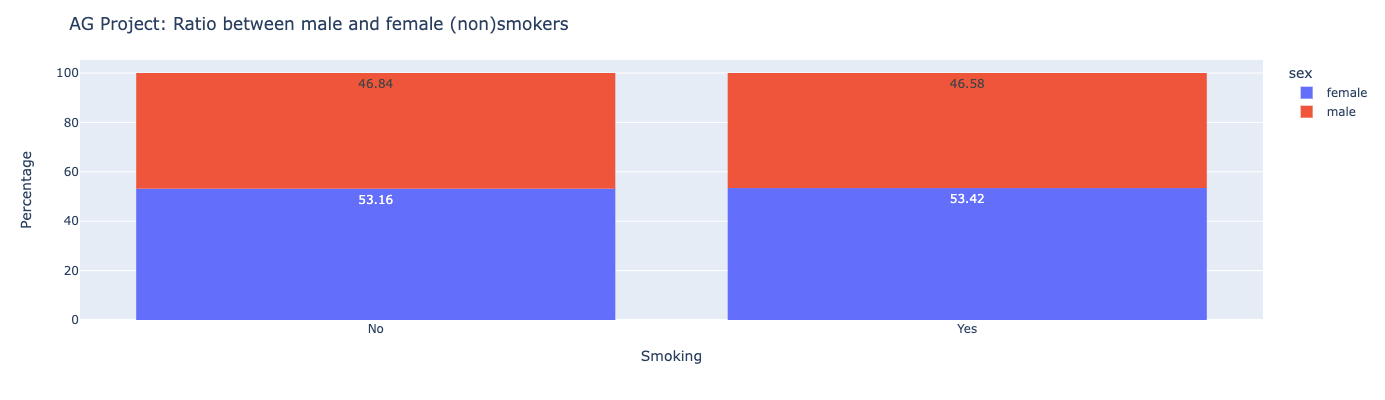

In [116]:
### Sex

fig = px.histogram(df, x="W_str", color="sex", barnorm='percent', text_auto=".2f",
                   width=800, height=400)

fig.update_layout(
    title_text='AG Project: Ratio between male and female (non)smokers', # title of plot
    xaxis_title_text='Smoking', # xaxis label
    yaxis_title_text='Percentage', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

#create plots dir
if not os.path.exists("plots"):
    os.mkdir("plots")

fig.write_image("plots/AG_sex.png")

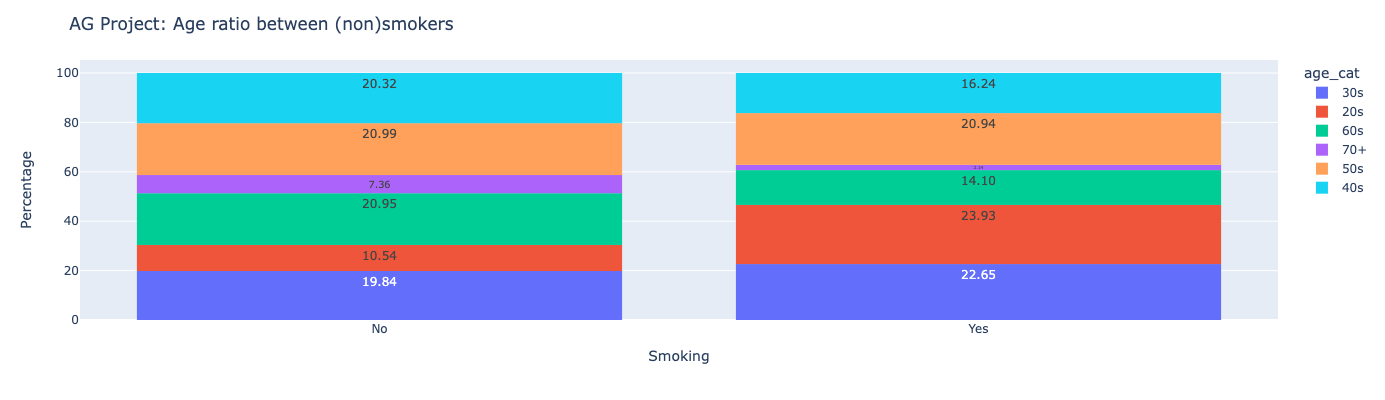

In [117]:
### Age

fig = px.histogram(df, x="W_str", color="age_cat", barnorm='percent', text_auto=".2f",
                   width=800, height=400)

fig.update_layout(
    title_text='AG Project: Age ratio between (non)smokers', # title of plot
    xaxis_title_text='Smoking', # xaxis label
    yaxis_title_text='Percentage', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()
fig.write_image("plots/AG_age.png")

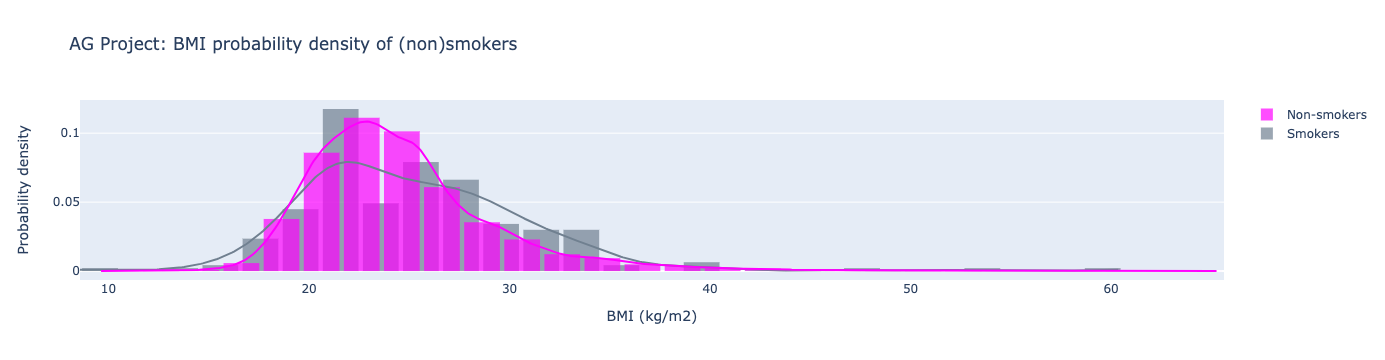

In [118]:
### BMI

hist_data = [smokers["bmi_corrected"], non_smokers["bmi_corrected"]]

group_labels = ['Smokers', 'Non-smokers']

colors = ['slategray', 'magenta']

fig = ff.create_distplot(hist_data, group_labels, bin_size=2, show_rug=False,
                         histnorm="probability density", colors=colors)


fig.update_layout(
    title_text='AG Project: BMI probability density of (non)smokers', # title of plot
    xaxis_title_text="BMI (kg/m2)", # xaxis label
    yaxis_title_text='Probability density', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.01 # gap between bars of the same location coordinates
)
fig.show()
fig.write_image("plots/AG_bmi.png")

## Create pairs of samples

In [119]:
df_match = ag_data.copy()
df_match.shape

(12089, 660)

In [120]:
df_match["is_treated"] = df_match["W"].astype(bool)
df_match["pair_nb"] = np.nan

df_match.shape

(12089, 662)

In [196]:
# Optional weights for each covariate when computing the distances
# WARNING: the order of the items in scaling needs to be the same as the order of the covariates (i.e. columns)
scaling =  np.ones((df_match.shape[1],), dtype=int)

scaling.shape

(662,)

In [122]:
sex_ix = df_match.columns.get_loc("sex")
age_cat_ix = df_match.columns.get_loc("age_cat")
bmi_corrected_ix = df_match.columns.get_loc("bmi_corrected")

In [158]:
# set the thresholds for each covariate, default is Inf (i.e. no matching)
thresholds =  np.empty((df_match.shape[1], ))
thresholds[:] = np.nan

# set particular values
thresholds[sex_ix] = 0
thresholds[age_cat_ix] = 1
thresholds[bmi_corrected_ix] = 4

thresholds.shape

# for i in [sex_ix, age_cat_ix, bmi_corrected_ix]:
#     print(thresholds[i])

(662,)

In [124]:
relevant_fields = ["sex", "age_cat", "bmi_corrected", "is_treated"]

In [ ]:
treated_units = df_match[df_match["is_treated"] == True]
control_units = df_match[df_match["is_treated"] == False]

N_treated = treated_units.shape[0]
N_control = control_units.shape[0]

print("Number of treated units: {0}".format(N_treated))
print("Number of control units: {0}".format(N_control))

In [ ]:
discrepancies = discrepancyMatrix(treated_units, control_units, thresholds, scaling)

In [ ]:
# pairwise difference between real-univariate covariate of treated VS control group
def pairDist(treated=np.array, control=np.array):
        
    D = treated[:, None] - control
    
    return D


# pairwise absolute difference between real-univariate covariates of treated VS control group
def abs_pairDist(treated=np.array, control=np.array):
        
    D = np.abs(treated[:, None] - control)
    
    return D


# pairwise difference between factor-valued (i.e. bounded integer-valued) covariates 
# (e.g. day of the week, month, ...) of treated VS control group, assuming the facotr levels are cyclic
# and only the shortest difference modulo nb_levels matters.
def pairModuloDist(treated=np.array, control=np.array, nb_levels=int):
    # test here
    
    categorical_treated = False
    t_str_value = []
    
    for i in treated:
        if i.dtype.type is np.string_:
            t_str_value.append(True)
            
    if np.any(t_str_value):
        categorical_treated = True
    
    if categorical_treated:
        treated = pd.get_dummies(treated)
        treated = treated.values.argmax(1)
        
    categorical_control = False
    c_str_value = []
    
    for i in control:
        if i.dtype.type is np.string_:
            c_str_value.append(True)
            
    if np.any(c_str_value):
        categorical_control = True
            
    if categorical_control:
        control = pd.get_dummies(control)
        control = control.values.argmax(1)
        
    
    treated_control = pairDist(treated.astype(int), control.astype(int)) % nb_levels
    control_treated = pairDist(control.astype(int), treated.astype(int)) % nb_levels
    
    pmin = np.minimum(treated_control, np.transpose(control_treated))
    
    return pmin



# pairwise difference between covariates of treated VS control group
# Inputs: treated/control are of covariate vectors (one entry per unit, for a given covariate)
# Outputs: pairwise difference matrix
def pairdifference(treated=np.array, control=np.array):
    
    categorical = False
    str_value = []
    
    for i in treated:
        if i.dtype.type is np.string_:
            str_value.append(True)
            
    if np.any(str_value):
        categorical = True
            
    
    if categorical:
        
        nb_levels = len(np.unique(treated))
        D_mod = pairModuloDist(treated, control, nb_levels)
        
        return D_mod
    
    else:
        
        D_abs = abs_pairDist(treated,control)
        
        return D_abs
    
    
def discrepancyMatrix(treated, control, thresholds, scaling=None):
    
    nb_covariates = treated.shape[1]
    
    nrow = treated.shape[0]
    ncol = control.shape[0]
    D = np.zeros(shape=(nrow, ncol))
    
    non_admissible = np.full((nrow, ncol), False)
    
    for i in range(0, nb_covariates):
        
        if not np.isnan(thresholds[i]):
            
            t = np.array(treated.iloc[:, i])
            c = np.array(control.iloc[:, i])
            
            differences = pairdifference(t, c)
            D = D + differences*scaling[i]
            
            
            differences[np.isnan(differences)] = 0
            # differences = differences.fillna(np.inf)
             
            if thresholds[i] >= 0:
            
                non_admissible = non_admissible | (differences > thresholds[i])
            
            elif thresholds[i] < 0:
            
                non_admissible = non_admissible | (differences <= np.abs(thresholds[i]))
    
    D = D / nb_covariates
    
    D[ D == non_admissible] = np.nan
    
    return result